## Data and Dependencies

Firstly, we import all the dependencies we require and get the data. This data is obtained from the kaggle food choices challenge. 
This data is unclean and not preprocessed.

In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

dataset=pd.read_csv('food-GPA-dataset.csv')
#print(dataset.head(5))
print(dataset.shape)

dataset=dataset.values

original_data=dataset[:,1:61]
original_labels=dataset[:,0]

print(original_labels)


(125, 61)
['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.3' '3.3' '3.3' '3.5'
 '3.904' '3.4' '3.6' '3.1' nan '4' '3.6' '3.4' '2.2' '3.3' '3.87' '3.7'
 '3.7' '3.9' '2.8' '3.7' '3' '3.2' '3.5' '4' '4' '3.4' '2.8' '3.65' '3'
 '3.7' '3.4' '3.89' '3' '3.4' '2.9' '3.6' '3.5' '3.2' '3.605' '3.8' '2.8'
 '3.5' '3.83' '3.6' '3.3' '3.3' '3.292' '3.5' '3.35' '3.8' '2.8' '3.5'
 '3.7' '3.6' 'Personal ' '3.9' '2.6' '3.5' '3.2' '3' '3.6' '3.2' '3.67'
 '3.73' '4' '3.1' '3.79 bitch' '2.71' '3' '3.7' '3.1' '3' '3.9' '3.4'
 '3.5' '3.7' '3.7' '3.83' '2.6' '3' '3.2' '3.5' '3.2' '3.68' '3.8' '3.3'
 '3.2' '3.75' '3.5' '3.92' '3.9' '3.9' '3.2' '3.5' '3.4' nan '3.7'
 'Unknown' '3' '3' '3.8' '3.8' '3.4' '3.7' '2.9' '3.9' '3.6' '2.8' '3.3'
 '3.4' '3.77' '3.63' '3.2' '3.5' '3' '3.882' '3' '3.9']


As we can see there are lot of unwanted and corrupt values given in place of GPA field

## Data Cleaning and Preprocessing

In machine learning, the biggest deal is with the data..once we get data in a good format,then algorithm implementation is a cakewalk.
Here first we will select what all fields we require as data to predict the GPA.
Once that is done we will remove all the unwanted dirty filthy crazy unparliamentary words using regular expressions..in jargon terms, regex 8)

First we select the features we want manually...

In [166]:
df=pd.read_csv('food-GPA-dataset.csv')
data=df[["Gender","weight","breakfast","coffee","drink"]]
print(data.head())

   Gender                    weight  breakfast  coffee  drink
0       2                       187          1       1    1.0
1       1                       155          1       2    2.0
2       1  I'm not answering this.           1       2    1.0
3       1             Not sure, 240          1       2    2.0
4       1                       190          1       2    2.0


Here in the weight field we can see that most of the entries are pure rubbish or invalid
Now we have to change them as well as NaN values into valid entries.

In [167]:
#converting weight to integer values using regular expressions
df['weight'] = df['weight'].astype(str).str.replace(r'[^\d\d\d]', '').replace('', np.nan).astype(float)

data=df[["Gender","weight","breakfast","coffee","drink"]]
print(data.head())

   Gender  weight  breakfast  coffee  drink
0       2   187.0          1       1    1.0
1       1   155.0          1       2    2.0
2       1     NaN          1       2    1.0
3       1   240.0          1       2    2.0
4       1   190.0          1       2    2.0


Still we have those irritating NaN values.we would just replace them by median values of the whole column. This we will do directly after the data is split into training and testing.

Now we convert the pandas dataframe into a numpy array to split the whole data into training and testing data.

Now we can do this with all the values., but in this code we will try to predict the GPA scores only using weight of the student as a parameter.

In [168]:
data=df[["weight"]]
data=data.values

print(data[0][0])   #just a value is printed from the processed data

187.0


We need to clean the GPA values now which is going to be our target
We use regular expressions to replace the dirty values with logical float values.

In [169]:
# Use regex to clean blended data, fill missing values and set up dtype
labels = df['GPA'].str.replace(r'[^\d\.\d+]', '').replace((np.nan, ''), '3.5').astype(float).round(2)
print(labels.head())

#Converting into numpy array
labels=labels.values
print(labels[3])

0    2.40
1    3.65
2    3.30
3    3.20
4    3.50
Name: GPA, dtype: float64
3.2


## Splitting Data and Feeding to Model

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.3,random_state=2)

#To check if NaN values are there in the data, if yes then the regression model will not work.
np.isnan(x_train).any(), np.isnan(y_train).any(), np.isnan(x_test).any(), np.isnan(y_test).any()

(True, False, True, False)

Here we can see that in x_train and x_test, NaN values are sneaking around
So we replace NaN values with the median value of the entire data

In [171]:
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])

Feeding the data into the model and predict the values of y_test using x_test inputs.

In [179]:
model1=LinearRegression()

model1.fit(x_train,y_train)
y_prediction=model1.predict(x_test)

print(y_prediction)

[3.4729121  3.39189481 3.61137802 3.57602502 3.44345127 3.39926002
 3.45081648 3.45818169 3.48027731 3.39631394 3.46186429 3.38894873
 3.40662523 3.4729121  3.48764252 3.49500773 3.49795381 3.46554689
 3.37716439 3.40662523 3.46554689 3.44345127 3.40367914 3.46186429
 3.50237294 3.50237294 3.42135564 3.45081648 3.49500773 3.51710335
 3.46849298 3.3845296  3.50973815 3.43608606 3.41251739 3.48027731
 3.44345127 3.50237294]


## Accuracy, MSE and Variance Score for Linear Regression model

metrics.accuracy_score is used to measure classification accuracy as we used till now, it can't be used to measure accuracy of regression model because it doesn't make sense to see accuracy for regression - predictions rarely can equal the expected values. And if predictions differ from expected values by 1%, the accuracy will be zero, though these predictions are great.

Instead of accuracy_score, we can use other techniques such as model.score..,where model=LinearRegression().
Similarly, We can also use Mean Squared Error(MSE) and Variance score.

Accuracy of the Linear Regression model is : -16.141554790197898 %
Coefficients: 
 [0.00147304]
Mean squared error: %.2f 0.21493233342696047
Variance score: %.2f -0.16141554790197898
(38, 1)
(38,)


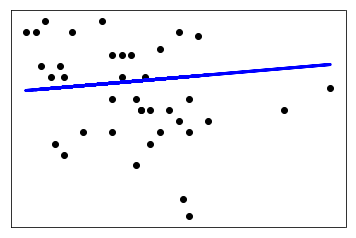

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


accuracy=model1.score(x_test,y_test)
print("Accuracy of the Linear Regression model is : "+str(accuracy*100)+" %")

# The coefficients
print('Coefficients: \n', model1.coef_)
# The mean squared error
print("Mean squared error: %.2f", mean_squared_error(y_test,y_prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f',r2_score(y_test,y_prediction))

print(x_test.shape)
print(y_test.shape)
# Plot outputs
plt.scatter(x_test,y_test,  color='black')
plt.plot(x_test,y_prediction, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Now, this is a pretty awful model...This is because as you can see the data is totally spread out and it is very difficult to get a straight line to fit across this data.

We will try with Support Vector Regression(SVR) and see what will be the result in that.

## Support Vector Regression (SVR)

In [177]:
from sklearn.svm import SVR

model2=SVR(kernel='linear')
model2.fit(x_train,y_train)

svr_pred=model2.predict(x_test)

## Accuracy, MSE and Variance Score for Linear Regression model

Accuracy of the Support Vector Regression model is : -19.59883734525838 %
Coefficients: 
 [[0.00066667]]
Mean squared error: %.2f 0.22133040350805933
Variance score: %.2f -0.1959883734525838
(38, 1)
(38,)


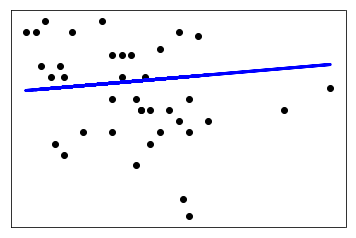

In [178]:
accuracy=model2.score(x_test,y_test)
print("Accuracy of the Support Vector Regression model is : "+str(accuracy*100)+" %")

# The coefficients
print('Coefficients: \n', model2.coef_)
# The mean squared error
print("Mean squared error: %.2f", mean_squared_error(y_test,svr_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f',r2_score(y_test,svr_pred))

print(x_test.shape)
print(y_test.shape)
# Plot outputs
plt.scatter(x_test,y_test,  color='black')
plt.plot(x_test,y_prediction, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

We can see the SVR model performs worse than Linear Regression...even worse with rbf kernel

We'll have a look at better data in the next code example...Whatever be it..we'll never use in-built dataset.